# Analysis for Table C for CUB

In [1]:
import ast
import copy
import pickle
import random

import numpy as np
import pandas as pd

In [2]:
import shutil
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from torchvision import transforms

sns.set()

/opt/homebrew/Caskroom/miniforge/base/envs/deep36/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Orders for Plotting

In [4]:
ORDER_DICT = {
    "ResNet-50": 1,
    "kNN": 2,
    "EMD-NN": 3,
    "EMD-Corr": 4,
    "CHM-NN": 5,
    "CHM-Corr": 6,
}

##  Load summary fo AI Performance

In [5]:
random.seed(42)

with open("../data/Classification-Summary-CUB.pickle", "rb") as f:
    classification_summary_cub = pickle.load(f)

In [6]:
classification_summary_cub.keys()

dict_keys(['GT', 'resnet_pred', 'knn_pred', 'emd_pred', 'chm_pred', 'resnet_wnid', 'knn_wnid', 'emd_wnid', 'chm_wnid', 'resnet_conf', 'knn_conf', 'emd_conf', 'chm_conf'])

### Unpacking

In [7]:
GT_CUB = classification_summary_cub["GT"]

M1Prediction_CUB = classification_summary_cub["resnet_pred"]
M2Prediction_CUB = classification_summary_cub["knn_pred"]
M3Prediction_CUB = classification_summary_cub["emd_pred"]
M4Prediction_CUB = classification_summary_cub["chm_pred"]

IsM1Correct_CUB = np.asarray(classification_summary_cub["resnet_wnid"])
IsM2Correct_CUB = np.asarray(classification_summary_cub["knn_wnid"])
IsM3Correct_CUB = np.asarray(classification_summary_cub["emd_wnid"])
IsM4Correct_CUB = np.asarray(classification_summary_cub["chm_wnid"])

M1Conf_CUB = np.asarray(classification_summary_cub["resnet_conf"])
M2Conf_CUB = np.asarray(classification_summary_cub["knn_conf"])
M3Conf_CUB = np.asarray(classification_summary_cub["emd_conf"])
M4Conf_CUB = np.asarray(classification_summary_cub["chm_conf"])

## AI Performance Analysis

In [8]:
MethodName = ["ResNet", "KNN", "EMD", "CHM"]
Methods = [IsM1Correct_CUB, IsM2Correct_CUB, IsM3Correct_CUB, IsM4Correct_CUB]
Confs = [M1Conf_CUB, M2Conf_CUB, M3Conf_CUB, M4Conf_CUB]

TAnalysis = {}
TCount = {}

for N, M, C in zip(MethodName, Methods, Confs):
    TAnalysis[N] = {}
    TCount[N] = {}

    for T in np.arange(0.0, 1.05, 0.05):
        TAnalysis[N][round(T, 2)] = np.mean(M[C >= T])
        TCount[N][round(T, 2)] = len(M[C >= T])

print("Done")

Done


/opt/homebrew/Caskroom/miniforge/base/envs/deep36/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/Caskroom/miniforge/base/envs/deep36/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## AI PERFORMANCE 

In [9]:
ai_df = pd.DataFrame(TAnalysis)
(100 * ai_df)

,ResNet,KNN,EMD,CHM
0.00,85.830169,85.467725,84.984467,83.275803
0.05,85.830169,85.467725,84.984467,83.275803
0.10,85.830169,85.467725,84.984467,83.275803
0.15,85.869753,85.585897,85.146118,83.356377
0.20,86.013502,85.585897,85.146118,83.356377
0.25,86.178156,85.758836,85.342585,83.558793
0.30,86.472334,87.180398,87.032731,85.639640
0.35,86.886975,88.682001,88.393515,87.249579
0.40,87.318456,88.682001,88.393515,87.249579
0.45,87.992091,90.134444,90.193050,89.629189


## Number of Images 

In [10]:
# Number of Images
count_df = pd.DataFrame(TCount)
count_df

,ResNet,KNN,EMD,CHM
0.00,5794,5794,5794,5794
0.05,5794,5794,5794,5794
0.10,5794,5794,5794,5794
0.15,5789,5786,5783,5786
0.20,5777,5786,5783,5786
0.25,5759,5772,5765,5766
0.30,5729,5632,5591,5550
0.35,5689,5478,5428,5341
0.40,5646,5478,5428,5341
0.45,5563,5281,5180,5043


## Ratios (out of `5794` Images)

In [11]:
# RATIOs (out of 44424 Images)
ratio_df = pd.DataFrame(TCount) / len(GT_CUB)
ratio_df

,ResNet,KNN,EMD,CHM
0.00,1.000000,1.000000,1.000000,1.000000
0.05,1.000000,1.000000,1.000000,1.000000
0.10,1.000000,1.000000,1.000000,1.000000
0.15,0.999137,0.998619,0.998101,0.998619
0.20,0.997066,0.998619,0.998101,0.998619
0.25,0.993959,0.996203,0.994995,0.995167
0.30,0.988781,0.972040,0.964964,0.957887
0.35,0.981878,0.945461,0.936831,0.921816
0.40,0.974456,0.945461,0.936831,0.921816
0.45,0.960131,0.911460,0.894028,0.870383


## Human Performance Analysis

In [12]:
summary_df = pd.read_csv("../data/CUB-Human-Study-Summary.csv")

### Removing Bad Users 



In [13]:
print(f"total {len(summary_df)} entries")

total 10860 entries


In [14]:
summary_df = summary_df.drop(summary_df[summary_df.Accuracy <= 0.5].index)

In [15]:
print(f"total {len(summary_df)} etnries")

total 10650 etnries


In [16]:
df_treshold = copy.deepcopy(summary_df[["Method", "Correctness", "ConfidenceScore"]])

## Human Performance

In [17]:
human_accuracy = {}
for T in np.arange(0.0, 1.05, 0.05):
    human_accuracy[f"{T:0.2f}"] = (
        df_treshold[df_treshold["ConfidenceScore"] < T]
        .groupby("Method")["Correctness"]
        .mean()
    )

In [18]:
pd.DataFrame.from_dict(human_accuracy).loc[::-1].reset_index().sort_values(
    by="Method", key=lambda x: x.map(ORDER_DICT)
)

,Method,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
1,ResNet-50,NaN,NaN,NaN,1.0,0.764706,0.794872,0.839286,0.764045,0.721739,0.693642,0.653846,0.592705,0.607843,0.572314,0.545614,0.546032,0.525547,0.517154,0.519075,0.545455,0.655000
0,kNN,NaN,NaN,NaN,1.0,1.000000,0.681818,0.507042,0.478261,0.478261,0.508516,0.507042,0.473103,0.473856,0.473856,0.496780,0.496780,0.511444,0.529549,0.529549,0.586043,0.586043
2,EMD-NN,NaN,NaN,NaN,0.6,0.600000,0.687500,0.557047,0.492126,0.492126,0.476658,0.489185,0.487350,0.493548,0.493548,0.509009,0.509009,0.529559,0.552924,0.552924,0.607955,0.607955
3,EMD-Corr,NaN,NaN,NaN,1.0,1.000000,0.866667,0.696970,0.603571,0.603571,0.587007,0.572379,0.572570,0.583423,0.583423,0.581967,0.581967,0.590372,0.606954,0.606954,0.645307,0.645307
4,CHM-NN,NaN,NaN,NaN,0.8,0.800000,0.615385,0.551351,0.549206,0.549206,0.531915,0.519440,0.506297,0.520457,0.520457,0.547877,0.547877,0.570000,0.601758,0.601758,0.643151,0.643151
5,CHM-Corr,NaN,NaN,NaN,1.0,1.000000,0.538462,0.722222,0.710611,0.710611,0.635776,0.629213,0.611538,0.605159,0.605159,0.623600,0.623600,0.633703,0.652022,0.652022,0.682883,0.682883


In [19]:
humand_df = (
    pd.DataFrame.from_dict(human_accuracy)
    .loc[::-1]
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
    .T
)

humand_df = humand_df.drop("Method")
humand_df.columns = ["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"]
humand_df

,ResNet-50,kNN,EMD-NN,EMD-Corr,CHM-NN,CHM-Corr
0.00,NaN,NaN,NaN,NaN,NaN,NaN
0.05,NaN,NaN,NaN,NaN,NaN,NaN
0.10,NaN,NaN,NaN,NaN,NaN,NaN
0.15,1.0,1.0,0.6,1.0,0.8,1.0
0.20,0.764706,1.0,0.6,1.0,0.8,1.0
0.25,0.794872,0.681818,0.6875,0.866667,0.615385,0.538462
0.30,0.839286,0.507042,0.557047,0.69697,0.551351,0.722222
0.35,0.764045,0.478261,0.492126,0.603571,0.549206,0.710611
0.40,0.721739,0.478261,0.492126,0.603571,0.549206,0.710611
0.45,0.693642,0.508516,0.476658,0.587007,0.531915,0.635776


In [20]:
def make_table(ai_group, human_group):
    agg_df = pd.DataFrame()
    agg_df["T"] = humand_df.index
    agg_df["T"] = agg_df["T"].astype(float).apply(lambda x: np.round(x, 2))
    agg_df["Ratio of Images Handled by AI"] = ratio_df[ai_group].values
    
    agg_df["AI Alone Performance"] = ai_df[ai_group].values
    agg_df["Human Performance on Remaining Images"] = humand_df[human_group].values
    agg_df["Aggregated Performance"] = (
        agg_df["Ratio of Images Handled by AI"] * agg_df["AI Alone Performance"]
    ) + (
        (1 - agg_df["Ratio of Images Handled by AI"])
        * agg_df["Human Performance on Remaining Images"]
    )

    agg_df = agg_df.set_index("T")

    agg_df["AI Alone Performance"] = (100 * agg_df["AI Alone Performance"]).round(2)
    agg_df["Human Performance on Remaining Images"] = (
        (100 * agg_df["Human Performance on Remaining Images"])
        .astype(float)
        .apply(lambda x: np.round(x, 2))
    )

    agg_df["Aggregated Performance"] = (
        (100 * agg_df["Aggregated Performance"])
        .astype(float)
        .apply(lambda x: np.round(x, 2))
    )

    agg_df["Ratio of Images Handled by AI"] = 100*agg_df[
        "Ratio of Images Handled by AI"
    ].round(4)

    return agg_df

In [21]:
make_table("ResNet", "ResNet-50")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,85.83,NaN,NaN
0.05,100.00,85.83,NaN,NaN
0.10,100.00,85.83,NaN,NaN
0.15,99.91,85.87,100.00,85.88
0.20,99.71,86.01,76.47,85.99
0.25,99.40,86.18,79.49,86.14
0.30,98.88,86.47,83.93,86.44
0.35,98.19,86.89,76.40,86.70
0.40,97.45,87.32,72.17,86.93


In [22]:
make_table("KNN", "kNN")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,85.47,NaN,NaN
0.05,100.00,85.47,NaN,NaN
0.10,100.00,85.47,NaN,NaN
0.15,99.86,85.59,100.00,85.61
0.20,99.86,85.59,100.00,85.61
0.25,99.62,85.76,68.18,85.69
0.30,97.20,87.18,50.70,86.16
0.35,94.55,88.68,47.83,86.45
0.40,94.55,88.68,47.83,86.45


In [23]:
make_table("EMD", "EMD-NN")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,84.98,NaN,NaN
0.05,100.00,84.98,NaN,NaN
0.10,100.00,84.98,NaN,NaN
0.15,99.81,85.15,60.00,85.10
0.20,99.81,85.15,60.00,85.10
0.25,99.50,85.34,68.75,85.26
0.30,96.50,87.03,55.70,85.94
0.35,93.68,88.39,49.21,85.92
0.40,93.68,88.39,49.21,85.92


In [39]:
make_table("EMD", "EMD-Corr")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,84.98,NaN,NaN
0.05,100.00,84.98,NaN,NaN
0.10,100.00,84.98,NaN,NaN
0.15,99.81,85.15,100.00,85.17
0.20,99.81,85.15,100.00,85.17
0.25,99.50,85.34,86.67,85.35
0.30,96.50,87.03,69.70,86.43
0.35,93.68,88.39,60.36,86.62
0.40,93.68,88.39,60.36,86.62


In [40]:
make_table("CHM", "CHM-NN")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,83.28,NaN,NaN
0.05,100.00,83.28,NaN,NaN
0.10,100.00,83.28,NaN,NaN
0.15,99.86,83.36,80.00,83.35
0.20,99.86,83.36,80.00,83.35
0.25,99.52,83.56,61.54,83.45
0.30,95.79,85.64,55.14,84.36
0.35,92.18,87.25,54.92,84.72
0.40,92.18,87.25,54.92,84.72


In [41]:
make_table("CHM", "CHM-Corr")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,83.28,NaN,NaN
0.05,100.00,83.28,NaN,NaN
0.10,100.00,83.28,NaN,NaN
0.15,99.86,83.36,100.00,83.38
0.20,99.86,83.36,100.00,83.38
0.25,99.52,83.56,53.85,83.42
0.30,95.79,85.64,72.22,85.07
0.35,92.18,87.25,71.06,85.98
0.40,92.18,87.25,71.06,85.98


## Number of Samples

In [27]:
human_count = {}
for T in np.arange(0.0, 1.05, 0.05):
    human_count[f"{T:0.2f}"] = (
        df_treshold[df_treshold["ConfidenceScore"] < T]
        .groupby("Method")["Correctness"]
        .count()
    )

In [28]:
pd.DataFrame.from_dict(human_count).loc[::-1].reset_index().sort_values(
    by="Method", key=lambda x: x.map(ORDER_DICT)
)

,Method,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
1,ResNet-50,NaN,NaN,NaN,5,17,39,56,89,115,173,234,329,408,484,570,630,685,787,865,1056,1800
0,kNN,NaN,NaN,NaN,9,9,22,142,276,276,411,568,725,918,918,1087,1087,1136,1286,1286,1476,1476
2,EMD-NN,NaN,NaN,NaN,5,5,16,149,254,254,407,601,751,930,930,1110,1110,1201,1351,1351,1584,1584
3,EMD-Corr,NaN,NaN,NaN,4,4,15,165,280,280,431,601,751,929,929,1098,1098,1184,1323,1323,1545,1545
4,CHM-NN,NaN,NaN,NaN,5,5,13,185,315,315,470,643,794,1051,1051,1201,1201,1300,1479,1479,1701,1701
5,CHM-Corr,NaN,NaN,NaN,5,5,13,180,311,311,464,623,780,1008,1008,1161,1161,1264,1434,1434,1665,1665


In [29]:
summary_df.head(2)

,UID,Query,Counter balance,Validation Reaction Time,Test Reaction Time,Date,Correctness,Accuracy,Total Corrects,Method,GroundTruth,ClassifierCorrectness,ConfidenceScore,DifficultyLevel,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf
0,5791dae225cb71000128ad5bNo-XAI,Hooded_Oriole_0105_90875.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,1,0.566667,17,ResNet-50,096.Hooded_Oriole,0,0.88,Hard,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,0.88,0.0125,0.0175,0.0125
1,5791dae225cb71000128ad5bNo-XAI,Chuck_Will_Widow_0051_796991.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,0,0.566667,17,ResNet-50,022.Chuck_will_Widow,1,0.72,Medium,022.Chuck_will_Widow,105.Whip_poor_Will,105.Whip_poor_Will,105.Whip_poor_Will,0.72,0.0275,0.0225,0.0300


In [30]:
optimal_T_cub = {
    "ResNet-50": 0.6,
    "kNN": 0.45,
    "EMD-NN": 0.30,
    "EMD-Corr": 0.4,
    "CHM-NN": 0.4,
    "CHM-Corr": 0.4,
}

In [31]:
summary_df.Method.unique()

array(['ResNet-50', 'kNN', 'EMD-Corr', 'CHM-NN', 'CHM-Corr', 'EMD-NN'],
      dtype=object)

In [32]:
dfs = []

for k, v in optimal_T_cub.items():
    new_df = summary_df[
        (summary_df["ConfidenceScore"] < v) & (summary_df["Method"] == k)
    ]
    dfs.append(new_df)

In [33]:
df_offloads = pd.concat(dfs, axis=0)

In [34]:
df_difflevel = (
    df_offloads.groupby(["UID", "Method", "DifficultyLevel", "ClassifierCorrectness"])[
        "Correctness"
    ]
    .agg(["count", "sum", "mean"])
    .unstack()
    .stack()
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
)
df_difflevel["mean"] = df_difflevel["mean"] * 100

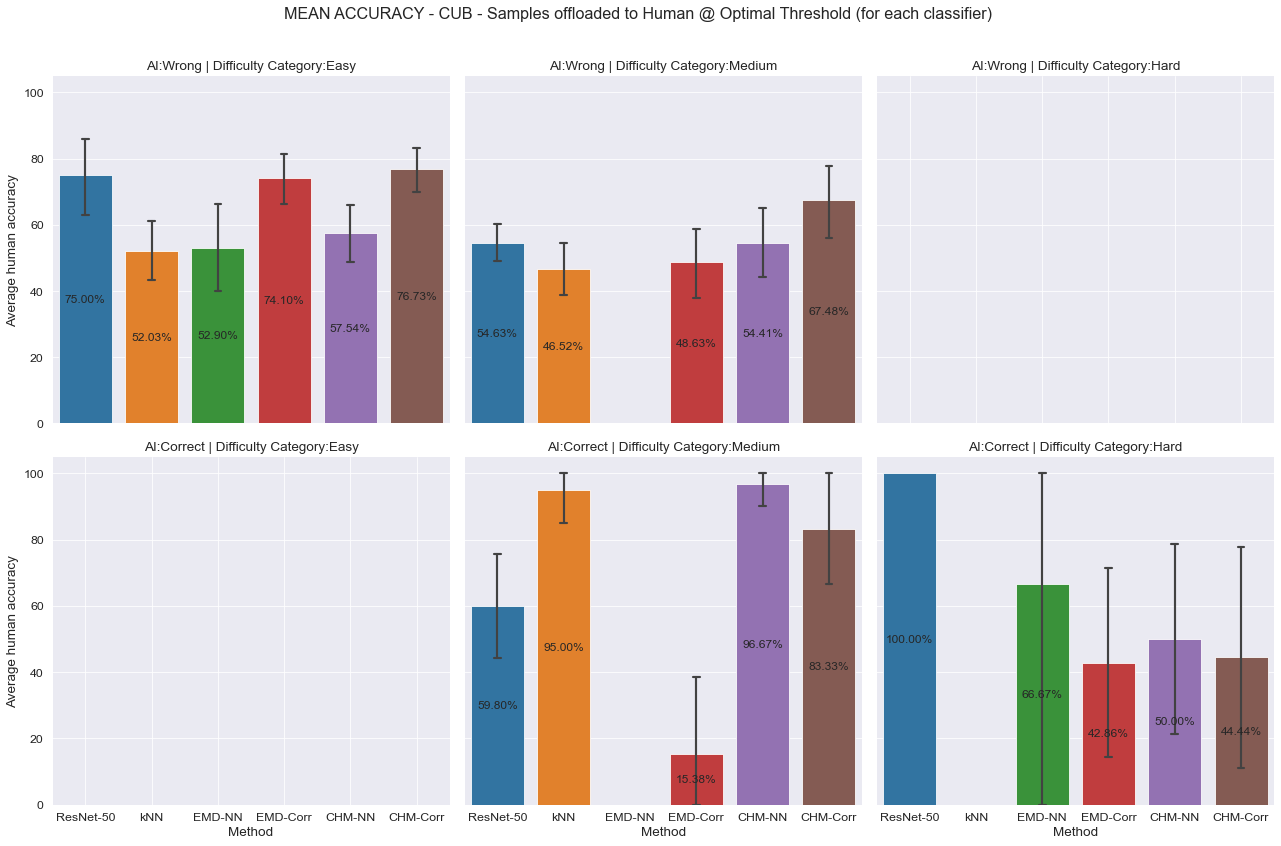

In [35]:
with sns.plotting_context("paper", font_scale=1.4):
    g = sns.FacetGrid(
        df_difflevel,
        col="DifficultyLevel",
        row="ClassifierCorrectness",
        height=6,
        col_order=["Easy", "Medium", "Hard"],
    )
    g.map(
        sns.barplot,
        "Method",
        "mean",
        order=["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"],
        palette="tab10",
        capsize=0.1,
    )

    [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

    for ax in g.axes.flat:
        for container in ax.containers:
            ax.bar_label(container, fontsize=12, fmt="%.2f%%", label_type="center")

    plt.ylim(0, 105)

    axes = g.axes.flatten()
    for ci, C in enumerate(["Wrong", "Correct"]):
        for di, D in enumerate(["Easy", "Medium", "Hard"]):
            axes[(ci * 3) + di].set_title(f"AI:{C} | Difficulty Category:{D}")

    axes[0].set_ylabel("Average human accuracy")
    axes[3].set_ylabel("Average human accuracy")

    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(
        "MEAN ACCURACY - CUB - Samples offloaded to Human @ Optimal Threshold (for each classifier) \n\n"
    )

    plt.show()

In [36]:
df_correctness = (
    df_offloads.groupby(["UID", "Method", "ClassifierCorrectness"])["Correctness"]
    .agg(["count", "sum", "mean"])
    .unstack()
    .stack()
    .reset_index()
)
df_correctness["mean"] *= 100

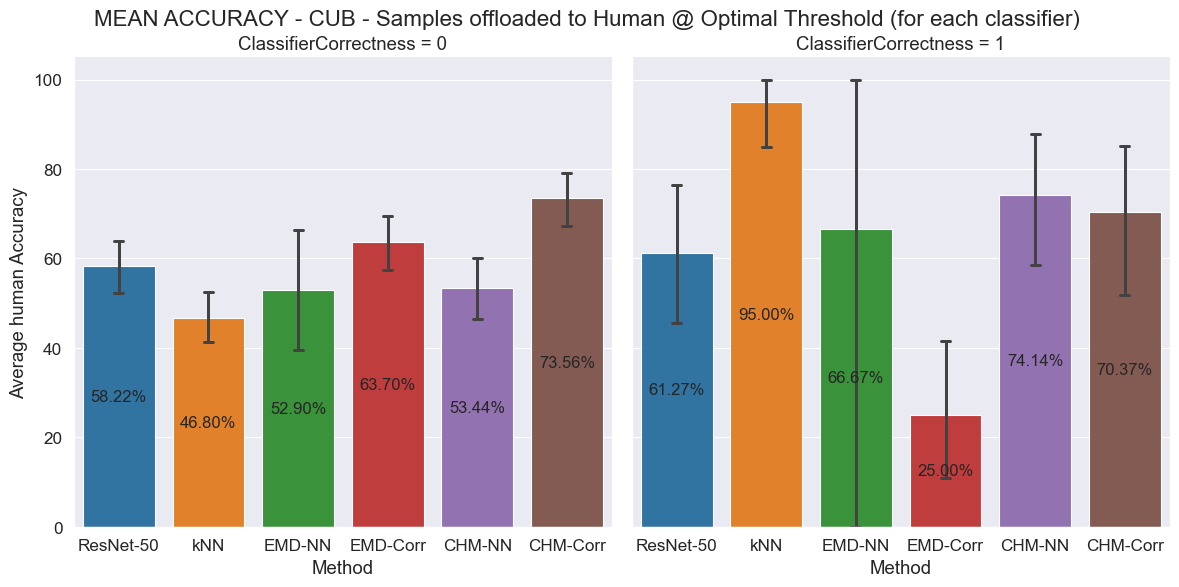

In [37]:
with sns.plotting_context("paper", font_scale=1.4):
    g = sns.FacetGrid(df_correctness, col="ClassifierCorrectness", height=6)
    g.map(
        sns.barplot,
        "Method",
        "mean",
        order=["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"],
        palette="tab10",
        capsize=0.1,
    )

    [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

    for ax in g.axes.flat:
        for container in ax.containers:
            ax.bar_label(container, fontsize=12, label_type="center", fmt="%.2f%%")

    axes = g.axes.flatten()
    axes[0].set_ylabel("Average human Accuracy")

    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(
        "MEAN ACCURACY - CUB - Samples offloaded to Human @ Optimal Threshold (for each classifier) \n\n"
    )

    plt.show()

In [38]:
human_trial_counters = {}
for T in np.arange(0.0, 1.05, 0.05):
    human_trial_counters[f"{T:0.2f}"] = trial_stats_analysis(T)

NameError: name 'trial_stats_analysis' is not defined

In [ ]:
df_hp = (
    pd.DataFrame.from_dict(human_accuracy)
    .loc[::-1]
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
)

trials_df = (
    pd.DataFrame.from_dict(human_count)
    .loc[::-1]
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
)

In [ ]:
# ONLY FOR RESNET-50

detailed_df = df_hp.loc[1].reset_index()
detailed_df.rename(columns={1: "Human Performance"}, inplace=True)
detailed_df.rename(columns={"index": "T"}, inplace=True)

detailed_df["# Trials"] = trials_df.loc[1].reset_index()[1]
detailed_df = detailed_df.drop(0)


detailed_df["Human Performance"] = detailed_df["Human Performance"] * 100

detailed_df["# Trials"] = detailed_df["# Trials"].astype("Int64")
detailed_df["Human Performance"] = detailed_df["Human Performance"].astype("float")

human_trial_counters_C = [
    x[1] if 1 in x.keys() else 0 for x in human_trial_counters.values()
]
human_trial_counters_W = [
    x[0] if 0 in x.keys() else 1 for x in human_trial_counters.values()
]

detailed_df["# Trials - Correct Prediction"] = human_trial_counters_C
detailed_df["# Trials - Wrong Prediction"] = human_trial_counters_W

In [ ]:
detailed_df.round(2)

In [ ]:
df_rn_AI = df[df["ResNet-Conf"] >= 0.2]
df_rn_Human = df[df["ResNet-Conf"] < 0.2]

In [ ]:
df_rn_Human.groupby("Method")["Correctness"].mean().reset_index().sort_values(
    by="Method", key=lambda x: x.map(ORDER_DICT)
)

In [ ]:
images_for_human = list(set(df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["Query"]))

In [ ]:
Counter(df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["Correctness"])

In [ ]:
Counter(df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["Correctness"])

In [ ]:
Counter(df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["ClassifierCorrectness"])

In [ ]:
# Trials : 107
# Image: 37

In [ ]:
# len(images_for_human)

In [ ]:
images_for_human

In [ ]:
# df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]

In [ ]:
Q = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["Query"].values
G = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["GroundTruth"].values
C = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["ResNet-Conf"].values
P = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["ResNet-Prediction"].values

In [ ]:
display_transform = transforms.Compose(
    [transforms.Resize(256), transforms.CenterCrop(240)]
)

In [ ]:
scale_factor = 6
fig, axes = plt.subplots(2, 3, figsize=(3 * scale_factor, 2 * scale_factor))

for ax in axes.flat:
    ax.set_axis_off()


for i in range(2):
    for j in range(3):
        CTR = 1 + (i * 3 + j)
        item = str(Q[CTR])
        tmp = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]
        users = tmp[tmp["Query"] == Q[CTR]]
        axes[i, j].imshow(display_transform(Image.open(f"./cub_hard//{item}")))
        mua = np.mean(users["Correctness"]).round(2)

        axes[i, j].set_title(
            f"Prediction: {str(P[CTR].split('.')[-1].replace('_', ' '))}\nGT: {G[CTR].split('.')[-1].replace('_', ' ')} \n#Users: {users.shape[0]} - Mean User Acc: {mua}",
            fontsize=24,
        )

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)

fig.savefig("112c.pdf")